In [1]:


import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Layer, Lambda
from sklearn.model_selection import train_test_split
import os
import imageio
import cv2
import glob2
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils


Using TensorFlow backend.


In [2]:
import glob

In [3]:
%pwd
#'C:\\Users\\Thomas\\Malaria Project'

'C:\\Users\\Thomas\\Malaria Project'

In [4]:
example_image = imageio.imread('example.png')

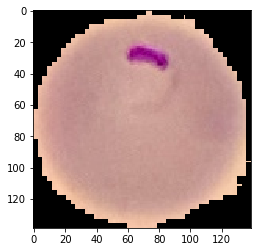

In [5]:
plt.imshow(example_image)

In [6]:
parasitized_cells = os.listdir('C:\\Users\\Thomas\\Malaria Project\\Parasitized\\')
#Importing the data for the parasitized cells

uninfected_cells = os.listdir('C:\\Users\\Thomas\\Malaria Project\\Uninfected')
#importing uninfected cell image data


In [7]:
print(len(parasitized_cells))
print(len(uninfected_cells))
#confirming all the data was put in 

13780
13780


In [8]:
data = []
labels = []

for img in parasitized_cells:
    try:
        img_read = plt.imread('C:\\Users\\Thomas\\Malaria Project\\Parasitized\\' + img)
        img_resize = cv2.resize(img_read, (50,50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        print("Error with Parasitized cell")
        
for img in uninfected_cells:
    try: 
        img_read = plt.imread('C:\\Users\\Thomas\\Malaria Project\\Uninfected\\' + img)
        img_resize = cv2.resize(img_read, (50,50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        print("Error with uninfected cell")


Error with Parasitized cell
Error with uninfected cell


### Journaling an error
Doing a basic for loop above for some reason creates an error:
"OSError: cannot identify image file 'C:\\Users\\Thomas\\Malaria Project\\Parasitized\\Thumbs.db'"

I tried searching for Thumbs.db but I could not find it so probalby some kind of hidden file and that is what required a try/except loop instead of a simple for loop.  This was not a problem I had anticipated. 

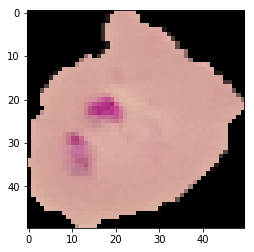

In [9]:
#Checking to see if the images were imported
plt.imshow(data[3])
plt.show()

In [10]:
image_data = np.array(data)
labels = np.array(labels)

In [11]:
#image_data

In [12]:
#image_data[13778]

In [13]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [14]:
import collections

labels
collections.Counter(labels)

Counter({0: 13779, 1: 13779})

In [15]:
#Train test split time
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = .2, random_state = 42)

In [16]:
import collections

collections.Counter(y_test)


Counter({0: 2804, 1: 2708})

I broke the code somehow.  There are supposed to be roughly equal 0 and 1 cells and yet all of the cells in the test set are 1 as of 10/29/19.   I don't know why. 

Edit:  10/20/19    Figured out the issue.   I had a typo where i forgot to change the folder name from parasitized to uninfected.   Still not sure why it only imported everything once instead of doubling up everything.  Another question for another time. 

In [17]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)

y_test  = np_utils.to_categorical(y_test, num_classes = 2)

In [18]:
print(f"Shape of training image data : {x_train.shape}")
print(f"Shape of testing image data : {x_test.shape}")
print(f"Shape of training labels : {y_train.shape}")
print(f"Shape of testing labels: {y_test.shape}")

Shape of training image data : (22046, 50, 50, 3)
Shape of testing image data : (5512, 50, 50, 3)
Shape of training labels : (22046, 2)
Shape of testing labels: (5512, 2)


In [19]:


import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers



In [20]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

Taking a lot from https://www.kaggle.com/harshel7/detecting-malaria-val-accuracy-97



In [21]:
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, 
                channels = channels)
model.summary()








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
____________________

In [22]:
import keras_metrics

In [23]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
#history = model.fit(Xtrain, ytrain, validation_split=0.3, epochs=10, verbose=0)

# evaluate the model
#loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [24]:
#Trying out some GPU stuff
from tensorflow.python.client import device_lib

In [25]:
#print(device_lib.list_local_devices())

import keras
import tensorflow as tf
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [26]:
from keras import backend as K
import tensorflow as tf
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [27]:
keras.backend.get_session().run(tf.global_variables_initializer())

In [28]:
first_model = model.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
22046/22046 [==============================] - 16s 733us/step - loss: 0.5473 - acc: 0.7656 - f1_m: 0.7656 - precision_m: 0.7656 - recall_m: 0.7656
Epoch 2/20
22046/22046 [==============================] - 7s 320us/step - loss: 0.2313 - acc: 0.9171 - f1_m: 0.9171 - precision_m: 0.9171 - recall_m: 0.9171
Epoch 3/20
22046/22046 [==============================] - 7s 332us/step - loss: 0.2006 - acc: 0.9325 - f1_m: 0.9325 - precision_m: 0.9325 - recall_m: 0.9325
Epoch 4/20
22046/22046 [==============================] - 8s 344us/step - loss: 0.1812 - acc: 0.9413 - f1_m: 0.9413 - precision_m: 0.9413 - recall_m: 0.9413 1s - loss: 0.1839 - acc: 0.9408 - f1_m: 0.9408 - precision_m: 0.940
Epoch 5/20
22046/22046 [==============================] - 8s 356us/step - loss: 0.1776 - acc: 0.9429 - f1_m: 0.9429 - precision_m: 0.9429 - recall_m: 0.9429
Epoch 6/20
22046/22046 [==============================] - 8s 365us/step - loss: 0.1714 - acc: 0.9454 - f1_m: 0.9454 - precision_m: 0.9454 - recall

In [29]:
predictions = model.evaluate(x_test, y_test)


print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

5512/5512 [==============================] - 1s 151us/step
LOSS : 0.13316735908043056
ACCURACY : 0.9557329462989841


# Alterations HERE

In [30]:
y_pred = model.predict(x_test)
y_pred_tensor = tf.convert_to_tensor(y_pred, np.float32)
y_test_tensor = tf.convert_to_tensor(y_test, np.float32)
sess = tf.InteractiveSession()



In [31]:
print('The precision is: '+ str((precision_m(y_test_tensor, y_pred_tensor)).eval()))
print('The recall is: '+ str((recall_m(y_test_tensor, y_pred_tensor)).eval()))
print('The f1 score is: '+ str((f1_m(y_test_tensor, y_pred_tensor)).eval()))

The precision is: 0.95573294
The recall is: 0.95573294
The f1 score is: 0.9557329


In [32]:
# loss, accuracy, f1_score, precision, recall= model.evaluate(x_test, y_test, verbose=0)

In [33]:
#print(loss, accuracy, f1_score, precision, recall)

In [34]:
#compiling the model 
#compile the model
#model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', 
#              metrics = [keras_metrics.precision(), keras_metrics.recall()])

In [35]:
#first_model = model.fit(x_train, y_train, epochs = 20, batch_size = 32)

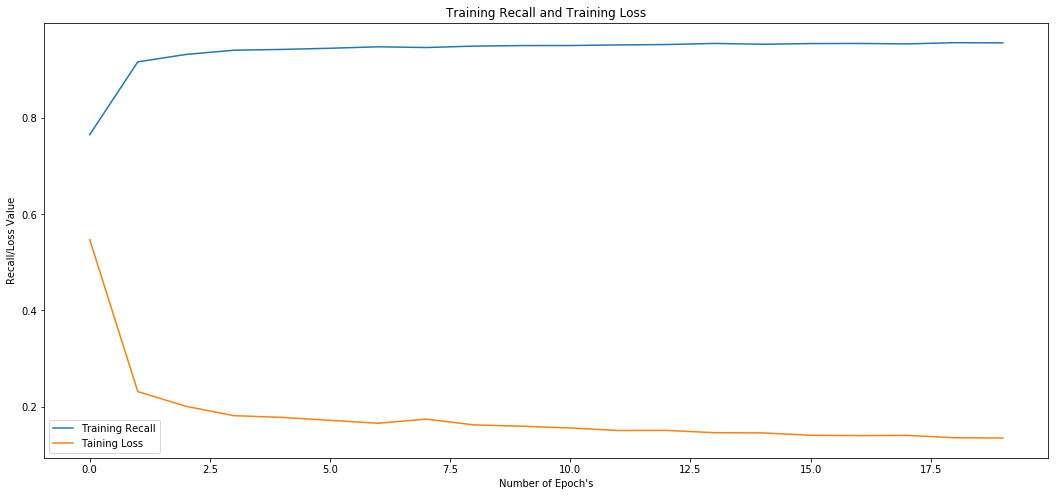

In [36]:
plt.figure(figsize = (18,8))
plt.plot(range(20), first_model.history['acc'], label = 'Training Recall')
plt.plot(range(20), first_model.history['loss'], label = 'Taining Loss')

plt.xlabel("Number of Epoch's")
plt.ylabel('Recall/Loss Value')
plt.title('Training Recall and Training Loss')
plt.legend(loc = "best")
#graphing how the accuracy and loss change over the epochs

In [37]:
print(type(y_test))
print(type(x_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [38]:
#predictions = model.evaluate(x_test, y_test)


## 11-27-19 Issue with this notebook
So initially I kept running into Keras issues but restarting my computer fixed that.  NOw I am just trying to make things applicable to all of my notebooks across the different versions. 

Quick lesson is that i need to create new variables to store the tensors that will be fed into the custom metric functions.  This will allow me to still measure accuraccy normally and then expand on this by doing the same for the augmented model. 

## Things to do 
1) Assign tensors of y_test and y_pred to new variables to not mess up cells testing accuracy. 
2) Do the same thing for the augmented data.  
3) Repeat as needed for all notebooks
4) place the str() around the second part of the custom functions on all notebooks.  As of this writing that is not yet fixed. 

In [39]:
from keras.models import load_model

In [40]:
#model.save('First_malaria_model')

In [41]:
#Trying to find what is in predictions
#print(predictions)

In [42]:


#print(f'LOSS : {predictions[0]}')
#print(f'ACCURACY : {predictions[1]}')



Got a 95.5% accuracy score on the model.  This is without any data augmentation. 

### The above few cells are just setting up smaller sets of data for testing my code.  In my final version these will not be in there and I will just simply jump straight into the code itself.  

Testing my code on about 26000 images sounds very annoying to wait for every time I want to run this thing. 

11-19-19 Mentor meeting
Create confusion matrix for results. 

Think about what is the best accuracy metric. 
Minimize the false negatives as much as possible. Do a confusion matrix. 

Also augment the data and see how it works.  

Try different strategies for the CNN

Try the different ideas and then do some speculation as to why some worked better or worse then others. 

Term I am looking for is "sensitivity" the true positive rate. 
    I have to mention why I believe a specific metric is the most important.  Why I believe sensitivity is the best, mostly because a false negative is the worst thing to happen here. 
Mentor suggests checking for F1 score,   

Mentor also says look up "lift from ground truth" 

Submit Capstone proposal


11-20-19 Work and solutions

I am picking sensitivity as the target for this project.  

I will later attempt to use data augmentation on the images.  This will be very annoying to run on my home PC so I will try to do it on Google drive and also on my home PC  



In [76]:
from keras.preprocessing.image import ImageDataGenerator

In [77]:
train_datagen = ImageDataGenerator(#rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator() #rescale = 1/255.)

train_generator = train_datagen.flow(x_train, y_train, batch_size = 64, shuffle = True)
val_generator = val_datagen.flow(x_test, y_test, batch_size = 64, shuffle = False)

## Previous Problem
For some reason that I still don't quite understand as of 12/9/19 getting rid of the rescale boosts the metrics a lot and I don't know why.  Rescaling from what I can read is supposed to be a good thing. 

Is it because I rescaled earlier in the notebook?  I dont' understand it at this point. 


In [93]:
augmented_model = CNNbuild(height = height, width = width, classes = classes, channels = channels)

In [79]:

aug_optim = optimizers.Adam(lr = 0.001, decay = 0.001 / 64)
augmented_model.compile(loss = 'categorical_crossentropy', 
                        optimizer = aug_optim, 
                        metrics = ['acc',f1_m,precision_m, recall_m])

In [80]:
history_augmented_model = augmented_model.fit_generator(train_generator,
                                 steps_per_epoch = len(x_train) // 64,
                                epochs = 20)

Epoch 1/20
344/344 [==============================] - 16s 48ms/step - loss: 0.7615 - acc: 0.6445 - f1_m: 0.6445 - precision_m: 0.6445 - recall_m: 0.6445 11s - loss: 0.9920 - acc: 0.5667 - f1_m
Epoch 2/20
344/344 [==============================] - 16s 46ms/step - loss: 0.4447 - acc: 0.8014 - f1_m: 0.8014 - precision_m: 0.8014 - recall_m: 0.8014 5s - loss: 0.4652 - acc: 0
Epoch 3/20
344/344 [==============================] - 16s 46ms/step - loss: 0.3668 - acc: 0.8476 - f1_m: 0.8476 - precision_m: 0.8476 - recall_m: 0.8476
Epoch 4/20
344/344 [==============================] - 16s 48ms/step - loss: 0.3330 - acc: 0.8699 - f1_m: 0.8699 - precision_m: 0.8699 - recall_m: 0.8699
Epoch 5/20
344/344 [==============================] - 17s 50ms/step - loss: 0.3139 - acc: 0.8806 - f1_m: 0.8806 - precision_m: 0.8806 - recall_m: 0.8806 4s - loss: 0.3134 - acc: 0.8801 - f1_m: 0.88
Epoch 6/20
344/344 [==============================] - 16s 46ms/step - loss: 0.2962 - acc: 0.8902 - f1_m: 0.8902 - precision

In [81]:
#augmented_model.save('Augmented_model')

In [82]:
prediction_2 = augmented_model.evaluate_generator(val_generator, steps = 5)

In [83]:


print(f'LOSS : {prediction_2[0]}')
print(f'ACCURACY : {prediction_2[1]}')

LOSS : 0.13754749670624733
ACCURACY : 0.95625


## 11-25-19
Slight improvement in accuracy and recall so that's doing what it is supposed to.  I was using evaluate when I should have been using evaluate generator.  Simple mistake that broke everything.  

In [84]:
print(prediction_2)

[0.13754749670624733, 0.95625, 0.9562499523162842, 0.95625, 0.95625]


In [85]:

predict2 = augmented_model.evaluate_generator(val_generator, steps = 5)

print(f'LOSS : {prediction_2[0]}')
print(f'ACCURACY : {prediction_2[1]}')

LOSS : 0.13754749670624733
ACCURACY : 0.95625


In [86]:
print(predict2)

[0.14658389538526534, 0.953125, 0.9531249403953552, 0.953125, 0.953125]


In [87]:
keras.__version__

'2.2.4'

In [88]:
tf.__version__

'1.14.0'

In [89]:
type(augmented_model)

keras.engine.sequential.Sequential

In [90]:
#y_pred_augmented = augmented_model.predict_generator(val_generator, steps = 5)


config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 31} )
sess = tf.Session(config=config) 
sess.as_default()

y_test_tensor = tf.convert_to_tensor(y_test, np.float32)

y_pred_augmented = augmented_model.predict(x_test)
y_pred_augmented_tensor = tf.convert_to_tensor(y_pred_augmented, np.float32)
print('The precision is: '+ str((precision_m(y_test_tensor, y_pred_augmented_tensor)).eval(session=sess)))
print('The recall is: '+ str((recall_m(y_test_tensor, y_pred_augmented_tensor)).eval(session=sess)))
print('The f1 score is: '+ str((f1_m(y_test_tensor, y_pred_augmented_tensor)).eval(session=sess)))

The precision is: 0.95410013
The recall is: 0.95410013
The f1 score is: 0.9541001


In [91]:
another_train_generator = train_datagen.flow(x_train, y_train, batch_size = 64, shuffle = True)

augmented_model.evaluate_generator(another_train_generator, steps=64)

[0.23080435453448445,
 0.915771484375,
 0.9157714257016778,
 0.915771484375,
 0.915771484375]

The precision, recall and f1 score are terrible there.  Suspiciously so considering tha the accuraccy is so high so something must be wrong here. 

## New Issue
Turns out the model evaluation utils is a module that he made or something?  https://towardsdatascience.com/detecting-malaria-with-deep-learning-9e45c1e34b60

I don't know how to fix it and I do know that for some reason this is messed up. 
import model_evaluation_utils as meu

## Result
Not as good as the first one but still good.  Fairly close in performance. 